In [1]:
# Import the useful libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from scipy.stats import expon, reciprocal
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt  # To calculate RMSE
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import the dataset
data = pd.read_csv("C:/Users/user/Desktop/Concrete.csv")

In [3]:
data.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
data.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [5]:
# Null data
data.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

In [6]:
# Duplicates in the dataset
data.duplicated().sum()

25

In [7]:
data.shape

(1030, 9)

In [8]:
# Drop duplicates
data.drop_duplicates(inplace=True)
data.shape

(1005, 9)

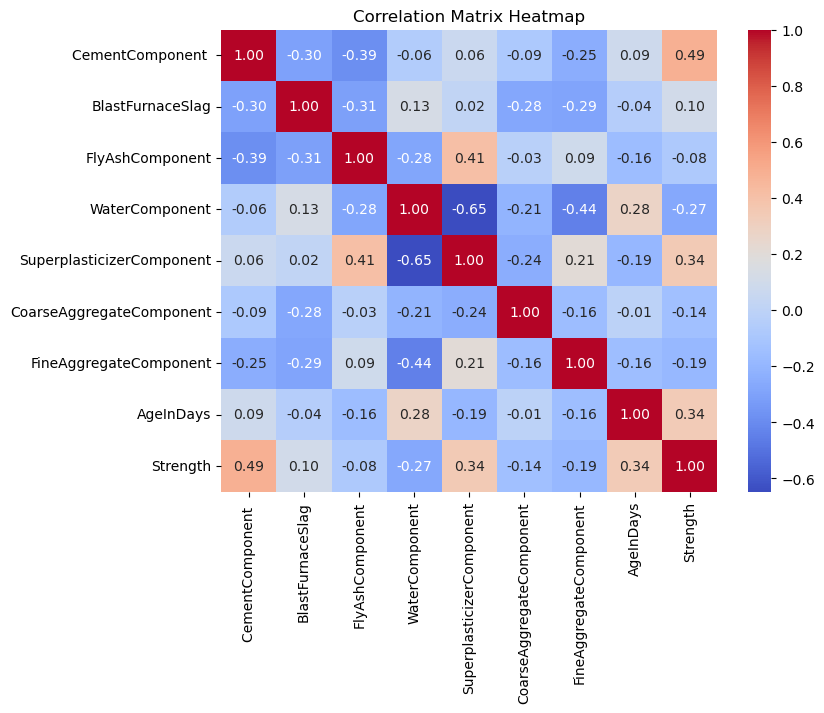

In [9]:
corr_matrix = data.corr()
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set plot title
plt.title("Correlation Matrix Heatmap")

# Display the plot
plt.show()


In [10]:
corr_matrix = data.corr()
corr_matrix

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
BlastFurnaceSlag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
FlyAshComponent,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
WaterComponent,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
SuperplasticizerComponent,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
CoarseAggregateComponent,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
FineAggregateComponent,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
AgeInDays,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


In [11]:
# Select the features using paarmeters with correlation > 0.15
features = ['CementComponent ','WaterComponent','SuperplasticizerComponent',
            'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

In [12]:
# Select the features
X = data[features]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1005 non-null   float64
 1   BlastFurnaceSlag           1005 non-null   float64
 2   FlyAshComponent            1005 non-null   float64
 3   WaterComponent             1005 non-null   float64
 4   SuperplasticizerComponent  1005 non-null   float64
 5   CoarseAggregateComponent   1005 non-null   float64
 6   FineAggregateComponent     1005 non-null   float64
 7   AgeInDays                  1005 non-null   int64  
 8   Strength                   1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [14]:
# Target variable
y = data[['Strength']]

In [15]:
# Data Splitting: Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
y_train = y_train.values.ravel()

In [17]:
print('X_train_shape: ' + str(X_train.shape) + '\nX_test_shape: ' + str(X_test.shape)\
       + '\ny_train_shape: ' + str(y_train.shape) + '\ny_test_shape: ' + str(y_test.shape))

X_train_shape: (804, 6)
X_test_shape: (201, 6)
y_train_shape: (804,)
y_test_shape: (201, 1)


In [18]:
# Create a StandardScaler to scale the features
scaler = SS()

In [19]:
# Fit and transform the training data with StandardScaler
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [22]:
# Hyperparameter tuning using Random Search
param_dist = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': reciprocal(1e-1, 1e3),
    'gamma': expon(scale=1.0),  
}

svr = SVR()

random_search = RandomizedSearchCV(svr, param_distributions=param_dist, n_iter=10, scoring='neg_mean_absolute_error', cv=5)
random_search.fit(X_train_scaled, y_train)

best_params_random = random_search.best_params_

In [23]:
# Train the best model with the tuned hyperparameters
best_regressor_random = SVR(**best_params_random)

In [24]:
# Perform cross-validation for the best model
cv_scores_random = cross_val_score(best_regressor_random, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

In [25]:
# Make predictions on the testing data for the best model
best_regressor_random.fit(X_train_scaled, y_train)
y_pred_random = best_regressor_random.predict(X_test_scaled)

In [26]:
# Calculate metrics for training data
y_train_pred = best_regressor_random.predict(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))

In [27]:
# Calculate metrics for testing data
r2_test = r2_score(y_test, y_pred_random)
mae_test = mean_absolute_error(y_test, y_pred_random)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_random))

In [28]:
# Display metrics
print(f"Best Parameters: {best_params_random}")
print("Training R-squared: {:.2f}".format(r2_train))
print("Training MAE: {:.2f}".format(mae_train))
print("Training RMSE: {:.2f}".format(rmse_train))
print("Testing R-squared: {:.2f}".format(r2_test))
print("Testing MAE: {:.2f}".format(mae_test))
print("Testing RMSE: {:.2f}".format(rmse_test))
print("Cross-Validation MAE: {:.2f}".format(-cv_scores_random.mean()))

Best Parameters: {'C': 340.28872425685756, 'gamma': 0.8425700006322207, 'kernel': 'rbf'}
Training R-squared: 0.98
Training MAE: 0.87
Training RMSE: 2.25
Testing R-squared: 0.87
Testing MAE: 3.82
Testing RMSE: 6.15
Cross-Validation MAE: 4.50


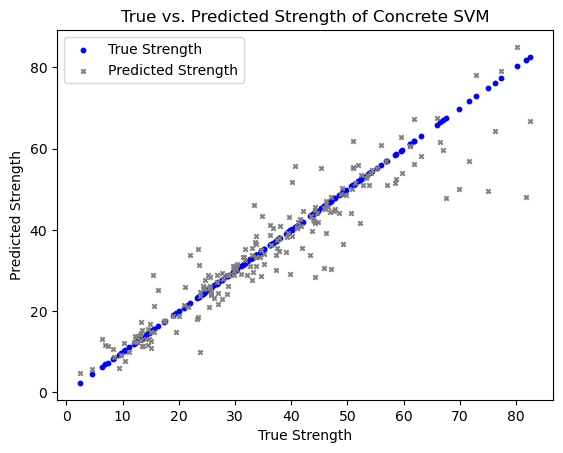

In [29]:
# Create a figure and axis
fig, ax = plt.subplots()

# Convert y_test and y_pred_random to one-dimensional arrays
y_test = np.ravel(y_test)
y_pred_random = np.ravel(y_pred_random)

# Set marker styles and colors for true and predicted values
ax.scatter(y_test, y_test, c='b', marker='o', label='True Strength', s=10) 
ax.scatter(y_test, y_pred_random, c='grey', marker='x', label='Predicted Strength', s=10)

# Add labels and a legend
ax.set_xlabel("True Strength")
ax.set_ylabel("Predicted Strength")
ax.set_title("True vs. Predicted Strength of Concrete SVM")
ax.legend()

# Show the plot
plt.show()


In [30]:
# Convert y_test and y_pred_random to one-dimensional arrays
y_test = np.ravel(y_test)
y_pred_random = np.ravel(y_pred_random)

# Round the predicted values to 2 decimal places
y_pred_random_rounded = np.around(y_pred_random, decimals=2)
# Create a Pandas DataFrame
true_vs_pred_df = pd.DataFrame({'True Strength': y_test, 'Predicted Strength SVR': y_pred_random_rounded})

true_vs_pred_df.head(10)

,True Strength,Predicted Strength SVR
0,19.01,18.74
1,24.29,26.27
2,26.32,23.16
3,34.57,28.68
4,44.13,42.26
5,33.00,27.67
6,17.28,17.63
7,25.42,21.00
8,33.73,31.10
9,34.40,33.39
